# Monte Carlo estimator

In [1]:
using DataFrames
using CairoMakie
using AlgebraOfGraphics
using Distributions
using StatsBase

## $\pi$ estimation

\begin{equation}
\hat{\pi}_{MC} = 4 \frac{\text{\# points in the circle}}{\text{\# total points}}.
\end{equation}

In [2]:
# set radio and number of samples
r = 2
m = 5000
# simulate points coordinates
x = rand(Uniform(-2, 2), m)
y = rand(Uniform(-2, 2), m)
# compute distance with respect to the origin
distances = sqrt.(x .^ 2 + y .^ 2)
inside = distances .< r
# obtain pi estimate
4 * (sum(inside) / m)

3.1208

Visualize the simulation

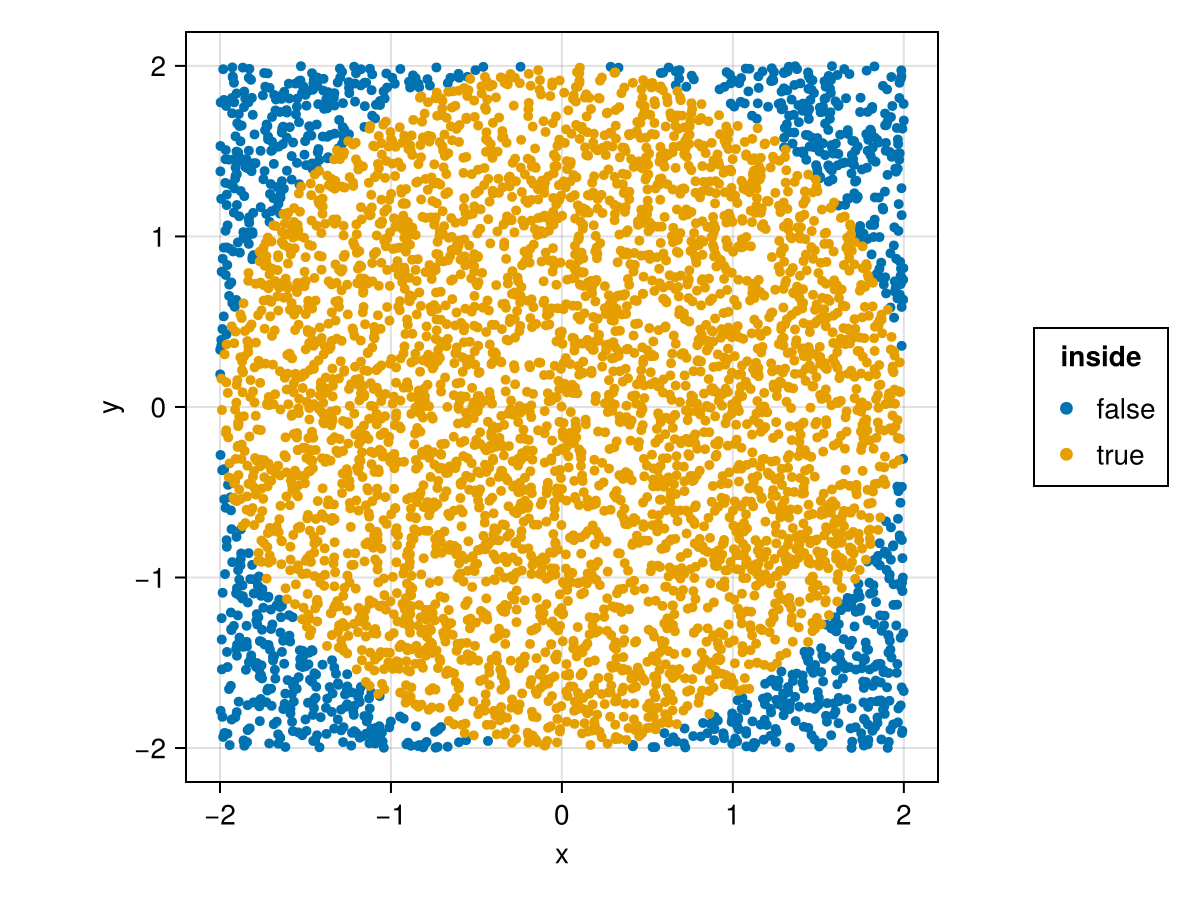

In [3]:
df = DataFrame(x = x, y = y, inside = inside)
g = data(df) * mapping(:x, :y, color = :inside) * visual(Scatter, markersize = 7)
fig = draw(g; axis = (aspect = DataAspect(),))

## Monte Carlo integration

In [4]:
using Distributions
using CairoMakie
using AlgebraOfGraphics
using DataFrames

### Mean estimate

In [5]:
# define the random variable
X = Exponential(100)
# obtain samples
m = 10000
xsamples = rand(X, m)
# aggregate results
estimate = sum(xsamples) / m
# variance
estimate_var = sum((xsamples .- estimate) .^ 2) / (m - 1) / m
println("Estimate: $(estimate) \nVariance of estimator: $(estimate_var)")

Estimate: 98.73695255871658 
Variance of estimator: 0.9865069864269411


What about $E[log(X)]$?

In [6]:
estimate2 = sum(log.(xsamples)) / m
estimate2_var = sum((log.(xsamples) .- estimate2) .^ 2) / (m - 1) / m
println("Estimate: $(estimate) \nVariance of estimator: $(estimate_var)")

Estimate: 98.73695255871658 
Variance of estimator: 0.9865069864269411


We can also check the error trend

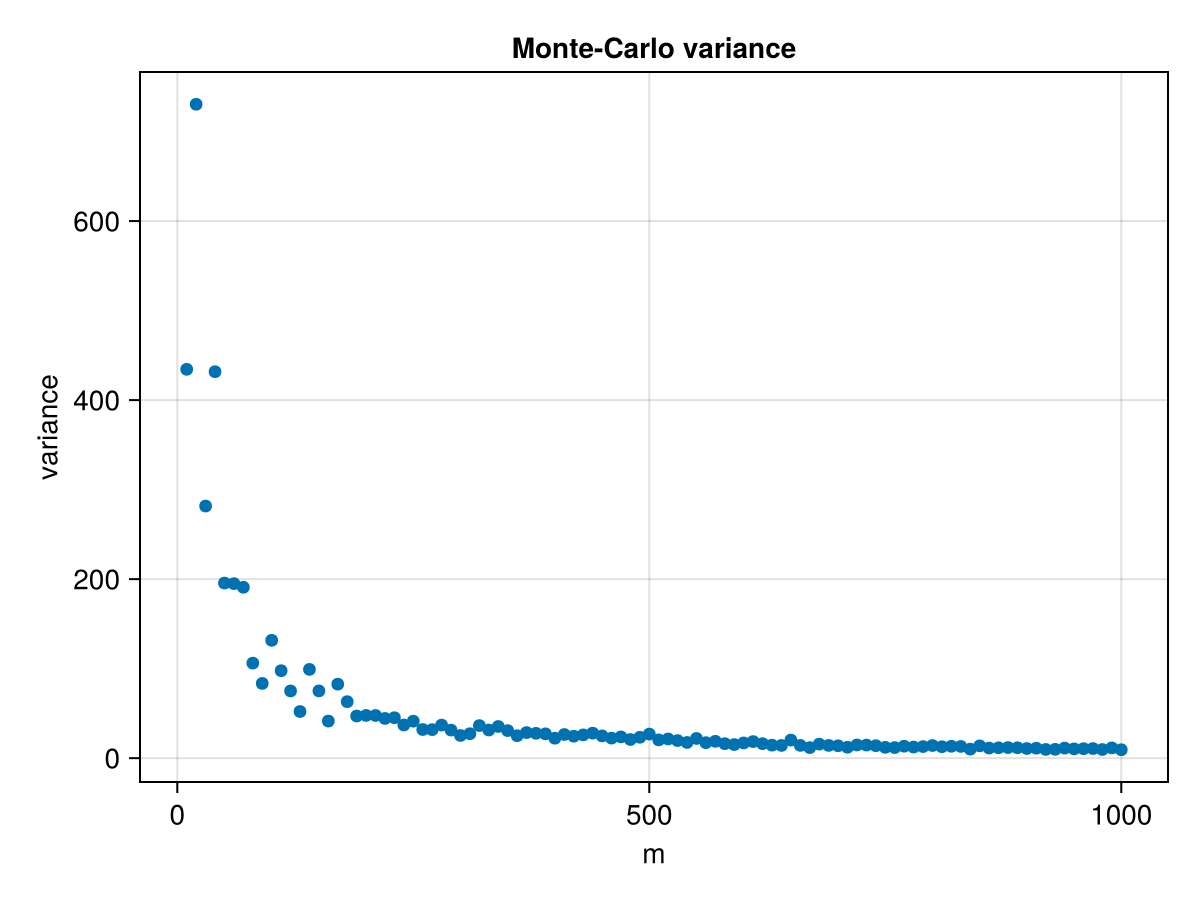

In [7]:
function mcvar(X, m)
    xsamples = rand(X, m)
    estimate = sum(xsamples) / m
    estimate_var = sum((xsamples .- estimate) .^ 2) / (m - 1) / m
end

mseq = 10:10:1000
varseq = mcvar.(Exponential(100), mseq)
fig = scatter(mseq, varseq, markersize = 9,
    axis = (title = "Monte-Carlo variance", xlabel = "m", ylabel = "variance"))

## Importance resampling algorithm

In this section, we simulate realization for random variables where the density function
is known up to a constant of proportionality $\pi(x) = kJ(x)$.

In [8]:
using CairoMakie
using Distributions
using StatsBase

### Beta example

\begin{align*}
  f(x) & = \frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1-x)^{\beta-1} ~~\text{for}~~ 0\leq
  x\leq 1 \\
  & \propto x^{\alpha-1}(1-x)^{\beta-1} = J(x).
\end{align*}

Set parameters and J

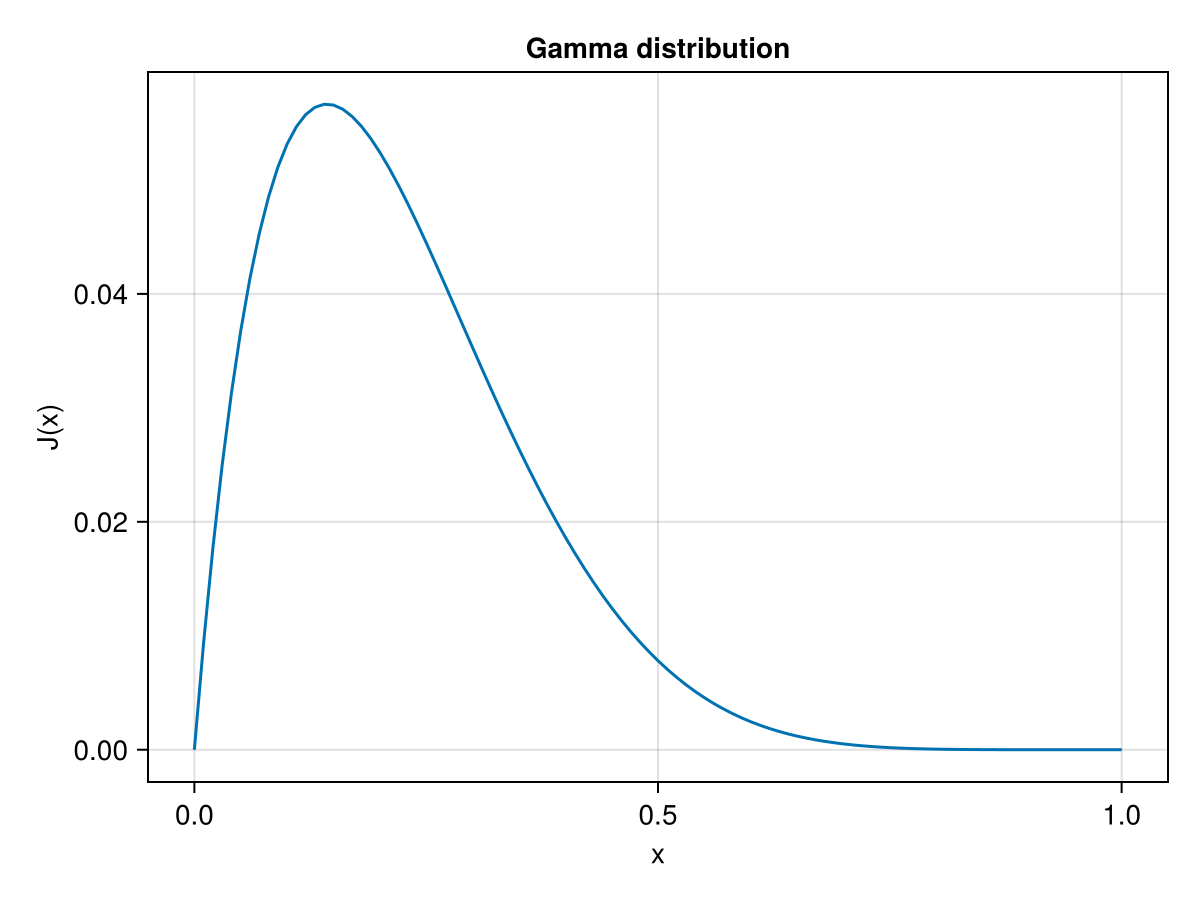

In [9]:
α = 2
β = 7
J(x) = x^(α-1) * (1-x)^(β-1)
fig = lines(0:0.01:1, J.(0:0.01:1),
    axis = (title =  "Gamma distribution", xlabel = "x", ylabel = "J(x)")
)

SIR

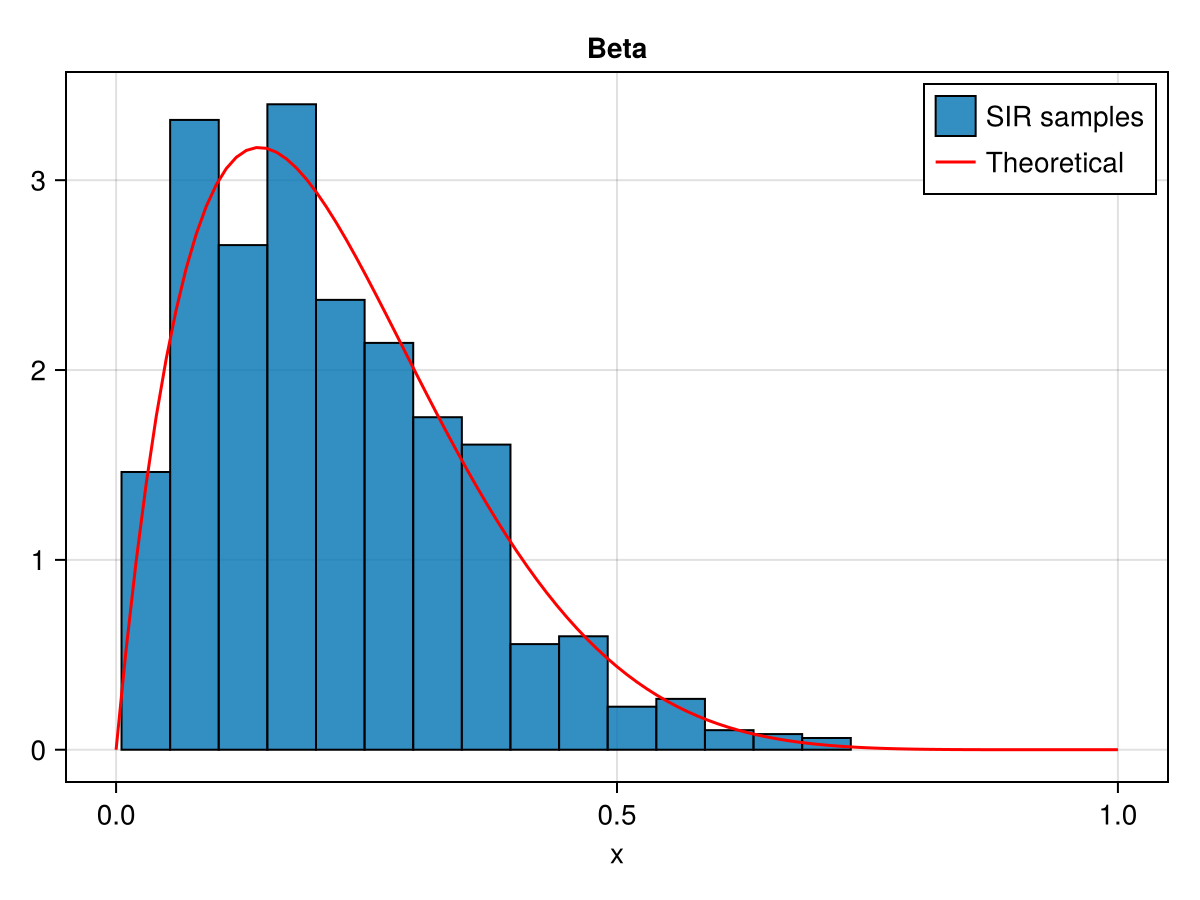

In [10]:
# set up n and m
n = 10000
m = 1000
# simulate from q()
y = rand(n)
# obtain the weights
yw = J.(y) ./ pdf.(Uniform(0,1), y)
yw_st = yw ./ sum(yw)
# resample from y
xsample = sample(y, Weights(yw_st), m)

# visualize
fig = hist(xsample, strokewidth = 1, normalization = :pdf, axis = (xlabel = "x", title = "Beta"), label = "SIR samples")
lines!(0:0.01:1, pdf.(Beta(α, β), 0:0.01:1), color = :red, label = "Theoretical")
axislegend()
fig

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*